In [1]:
from i3d_inception import  Inception_Inflated3d
from Data_Generator import DataLoader
import imageio
import keras
import tensorflow as tf
from tensorflow_docs.vis import embed
import numpy as np
import pickle
import os

2023-05-03 09:25:58.115787: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
model = Inception_Inflated3d(classes=261, input_shape=(20, 224, 224, 3))
model.load_weights(r'/home/nigar.alishzada/SLR/keras-kinetics-i3d/weights_all/weights-39-0.48.h5')

2023-05-03 09:25:59.979194: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-03 09:26:00.728862: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9636 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:17:00.0, compute capability: 7.5
2023-05-03 09:26:00.729828: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 9573 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:65:00.0, compute capability: 7.5


In [3]:
# Load data
data = DataLoader('/home/nigar.alishzada/SLR/WL_AzSL/videos_by_names',load_ohe_dicts=True)
dataset = data.stream_line(n_frames = 20,output_size=(224,224),frame_step = 1)

num_of_videos = len(dataset)
train_size = int(num_of_videos*0.95)
train_ds = dataset.take(train_size)
test_ds = dataset.skip(train_size)

def to_gif(images):
    converted_images = np.clip(images * 255, 0, 255).astype(np.uint8)
    imageio.mimsave('./animation.gif', converted_images, fps=20)
    return embed.embed_file('./animation.gif')

index_to_label = pickle.load(open('/home/nigar.alishzada/SLR/keras-kinetics-i3d/index_to_label.pkl','rb'))

In [4]:
for x, label in dataset.take(1):
    vid = x
    l = label

# vid = tf.reshape(vid, (1, 20, 224, 224, 3))
print(vid.shape)

print(index_to_label[np.argmax(l)])
# to_gif(vid)

(1, 20, 224, 224, 3)
GETMƏK



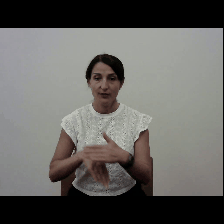

In [5]:
a = tf.reshape(vid, (20, 224, 224, 3))
to_gif(a)

In [17]:
video_path = r'/home/nigar.alishzada/SLR/keras-kinetics-i3d/2022-06-01 15-17-31.mp4'

video = DataLoader.frames_from_video_file(video_path, 90, frame_step = 1)

clip_size = 20
stride = 12
num_clips = int((90 - clip_size)/stride) + 1
clips = np.zeros((num_clips, clip_size, 224, 224, 3)) 
for i in range(num_clips):
    clips[i] = video[i*stride:i*stride+clip_size]


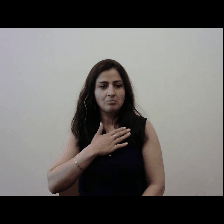

In [18]:
to_gif(clips[0])

In [19]:
vid = clips[2].reshape((1,20,224,224,3)) 
pred = model.predict(vid)
max_index = np.argmax(pred)
label = index_to_label[max_index]
label

1/1 [==============================] - 0s 31ms/step


'İŞTİRAK'

In [41]:
predictions = []
for clip in clips:
    clip = np.expand_dims(clip, axis=0) 
    prediction = model.predict(clip)
    max_index = np.argmax(prediction)
    label = index_to_label[max_index]
    predictions.append(label)
    # if prediction[0][max_index]>0:
    #     predictions.append(label)

print(predictions)

1/1 [==============================] - 0s 30ms/step
['LAZIM', 'İŞLƏMƏK', 'BAZAR', 'DƏRS', 'İSTƏMƏK']
